Для начала анализа, надо импортировать библиотеки

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Читаем .csv файл и выводим первые 10 строчек датасета

In [2]:
df = pd.read_csv('D:\Helper\MLBazyak\intensive\day7\main.csv')
df.head(10)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,ID 120271947,homeowner,https://elektrougli.cian.ru/sale/flat/305815701/,Электроугли,sale,flat,7.0,9.0,2.0,47.8,...,-1.0,-1,"28,2 м²",8 м²,79623650661,NaN,Школьная,40,Железнодорожная,NaN
1,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/299601370/,Электроугли,sale,flat,7.0,14.0,1.0,41.0,...,-1.0,-1,18 м²,9 м²,79623638905,NaN,Школьная,38,Железнодорожная,NaN
2,ID 115031885,homeowner,https://elektrougli.cian.ru/sale/flat/307496224/,Электроугли,sale,flat,2.0,5.0,1.0,25.0,...,-1.0,-1,12 м²,5 м²,79660478973,NaN,Советская,11,Железнодорожная,NaN
3,ID 15867135,real_estate_agent,https://elektrougli.cian.ru/sale/flat/307048067/,Электроугли,sale,flat,5.0,5.0,1.0,33.3,...,-1.0,-1,18 м²,8 м²,79104572936,NaN,Пионерская,6Б,Железнодорожная,NaN
4,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/308257607/,Электроугли,sale,flat,1.0,3.0,2.0,45.8,...,-1.0,-1,"26,7 м²",7 м²,79623638905,NaN,переулок 2-й Троицкий,3,Железнодорожная,NaN
5,Анна Глушук,realtor,https://elektrougli.cian.ru/sale/flat/304674980/,Электроугли,sale,flat,3.0,5.0,1.0,32.0,...,-1.0,-1,20 м²,6 м²,79651101677,NaN,Маяковского,32,Железнодорожная,NaN
6,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/308257604/,Электроугли,sale,flat,2.0,5.0,1.0,31.9,...,-1.0,-1,18 м²,6 м²,79623638905,NaN,Школьная,45Б,Железнодорожная,NaN
7,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/288560772/,Электроугли,sale,flat,3.0,9.0,1.0,35.4,...,-1.0,-1,22 м²,7 м²,79623638905,NaN,Советская,9,Железнодорожная,NaN
8,Норвик Банк,real_estate_agent,https://elektrougli.cian.ru/sale/flat/300048001/,Электроугли,sale,flat,4.0,5.0,3.0,62.9,...,-1.0,-1,-1,-1,79660613142,NaN,Маяковского,40,Железнодорожная,NaN
9,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/301834476/,Электроугли,sale,flat,5.0,5.0,2.0,42.0,...,-1.0,-1,29 м²,6 м²,79623638905,NaN,Школьная,51,Железнодорожная,NaN


Смотрим размерность датасета

In [3]:
df.shape

(20071, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                19591 non-null  object 
 1   author_type           19595 non-null  object 
 2   url                   20067 non-null  object 
 3   location              19663 non-null  object 
 4   deal_type             20070 non-null  object 
 5   accommodation_type    20070 non-null  object 
 6   floor                 20070 non-null  float64
 7   floors_count          20070 non-null  float64
 8   rooms_count           20070 non-null  float64
 9   total_meters          20070 non-null  object 
 10  price                 19992 non-null  float64
 11  year_of_construction  20070 non-null  object 
 12  object_type           20067 non-null  float64
 13  house_material_type   20067 non-null  object 
 14  heating_type          20067 non-null  float64
 15  finish_type        

In [5]:
float_list = ['floor', 'floors_count', 'rooms_count', 'price', 
              'heating_type', 'year_of_construction']

for var in float_list:
    df[var] = pd.to_numeric(df[var], errors='coerce').astype('Int64')

In [6]:
df['kitchen_meters'] = pd.to_numeric(
    df['kitchen_meters'].str.replace(',', '.').apply(lambda x: x[:-3] if pd.notna(x) else np.nan),
    errors='coerce'
).astype('float64') 

In [7]:
df['living_meters'] = pd.to_numeric(
    df['living_meters'].str.replace(',', '.').apply(lambda x: x[:-3] if pd.notna(x) else np.nan),
    errors='coerce'
).astype('float64')

In [8]:
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce').astype('float64')

In [9]:
# проверяем что все прошло успешно
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                19591 non-null  object 
 1   author_type           19595 non-null  object 
 2   url                   20067 non-null  object 
 3   location              19663 non-null  object 
 4   deal_type             20070 non-null  object 
 5   accommodation_type    20070 non-null  object 
 6   floor                 20070 non-null  Int64  
 7   floors_count          20070 non-null  Int64  
 8   rooms_count           20070 non-null  Int64  
 9   total_meters          20056 non-null  float64
 10  price                 19992 non-null  Int64  
 11  year_of_construction  19958 non-null  Int64  
 12  object_type           20067 non-null  float64
 13  house_material_type   20067 non-null  object 
 14  heating_type          20067 non-null  Int64  
 15  finish_type        

In [10]:
# можно заметить -1 в данных, которые обозначают их отсутствие
# поэтому заменим все -1 на Nan
df = df.replace('-1', np.nan)
df = df.replace(-1, np.nan)
df = df.replace(-1.0, np.nan)
df = df.replace('-1.0', np.nan)
df.head(10)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,ID 120271947,homeowner,https://elektrougli.cian.ru/sale/flat/305815701/,Электроугли,sale,flat,7,9,2,47.8,...,<NA>,NaN,28.2,8.0,79623650661,NaN,Школьная,40,Железнодорожная,NaN
1,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/299601370/,Электроугли,sale,flat,7,14,1,41.0,...,<NA>,NaN,18.0,9.0,79623638905,NaN,Школьная,38,Железнодорожная,NaN
2,ID 115031885,homeowner,https://elektrougli.cian.ru/sale/flat/307496224/,Электроугли,sale,flat,2,5,1,25.0,...,<NA>,NaN,12.0,5.0,79660478973,NaN,Советская,11,Железнодорожная,NaN
3,ID 15867135,real_estate_agent,https://elektrougli.cian.ru/sale/flat/307048067/,Электроугли,sale,flat,5,5,1,33.3,...,<NA>,NaN,18.0,8.0,79104572936,NaN,Пионерская,6Б,Железнодорожная,NaN
4,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/308257607/,Электроугли,sale,flat,1,3,2,45.8,...,<NA>,NaN,26.7,7.0,79623638905,NaN,переулок 2-й Троицкий,3,Железнодорожная,NaN
5,Анна Глушук,realtor,https://elektrougli.cian.ru/sale/flat/304674980/,Электроугли,sale,flat,3,5,1,32.0,...,<NA>,NaN,20.0,6.0,79651101677,NaN,Маяковского,32,Железнодорожная,NaN
6,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/308257604/,Электроугли,sale,flat,2,5,1,31.9,...,<NA>,NaN,18.0,6.0,79623638905,NaN,Школьная,45Б,Железнодорожная,NaN
7,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/288560772/,Электроугли,sale,flat,3,9,1,35.4,...,<NA>,NaN,22.0,7.0,79623638905,NaN,Советская,9,Железнодорожная,NaN
8,Норвик Банк,real_estate_agent,https://elektrougli.cian.ru/sale/flat/300048001/,Электроугли,sale,flat,4,5,3,62.9,...,<NA>,NaN,NaN,NaN,79660613142,NaN,Маяковского,40,Железнодорожная,NaN
9,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/301834476/,Электроугли,sale,flat,5,5,2,42.0,...,<NA>,NaN,29.0,6.0,79623638905,NaN,Школьная,51,Железнодорожная,NaN


In [11]:
# чтобы понять, какие колонки оставлять, а какие оставлять, 
# рассмотрим процентаж пропусков в каждой из них
# поставим трешхолд 20% пропусков, и удалим каждую колонку,
# которая его не соблюдает
missing_procent = df.isna().mean()*100
missing_procent

author                    2.391510
author_type               2.371581
url                       0.019929
location                  2.032784
deal_type                 0.004982
accommodation_type        0.004982
floor                     0.004982
floors_count              0.004982
rooms_count               0.732400
total_meters              0.074735
price                     0.393603
year_of_construction     21.384086
object_type             100.000000
house_material_type      86.836730
heating_type            100.000000
finish_type              82.322754
living_meters            22.579842
kitchen_meters           13.945493
phone                     0.019929
district                 48.188929
street                   15.206019
house_number             10.856460
underground              31.582881
residential_complex      52.792586
dtype: float64

In [12]:
for column, procent in missing_procent.items():
    if procent > 50:
        print(f'Колонка {column} не прошла трешхолд, удаление...')
        del df[column]

Колонка object_type не прошла трешхолд, удаление...
Колонка house_material_type не прошла трешхолд, удаление...
Колонка heating_type не прошла трешхолд, удаление...
Колонка finish_type не прошла трешхолд, удаление...
Колонка residential_complex не прошла трешхолд, удаление...


In [13]:
for column in ['url', 'author', 'house_number', 'phone']:
    del df[column]

In [14]:
# Пример для столбца 'column_name'
object_values = df['total_meters'][df['total_meters'].apply(lambda x: isinstance(x, str))]
print(object_values)


Series([], Name: total_meters, dtype: float64)


In [15]:
df['price_per_meter'] = df['price'] / df['total_meters']
df['price_per_meter'].head()

0    138075.313808
1    130487.804878
2         130000.0
3    105105.105105
4    105895.196507
Name: price_per_meter, dtype: Float64

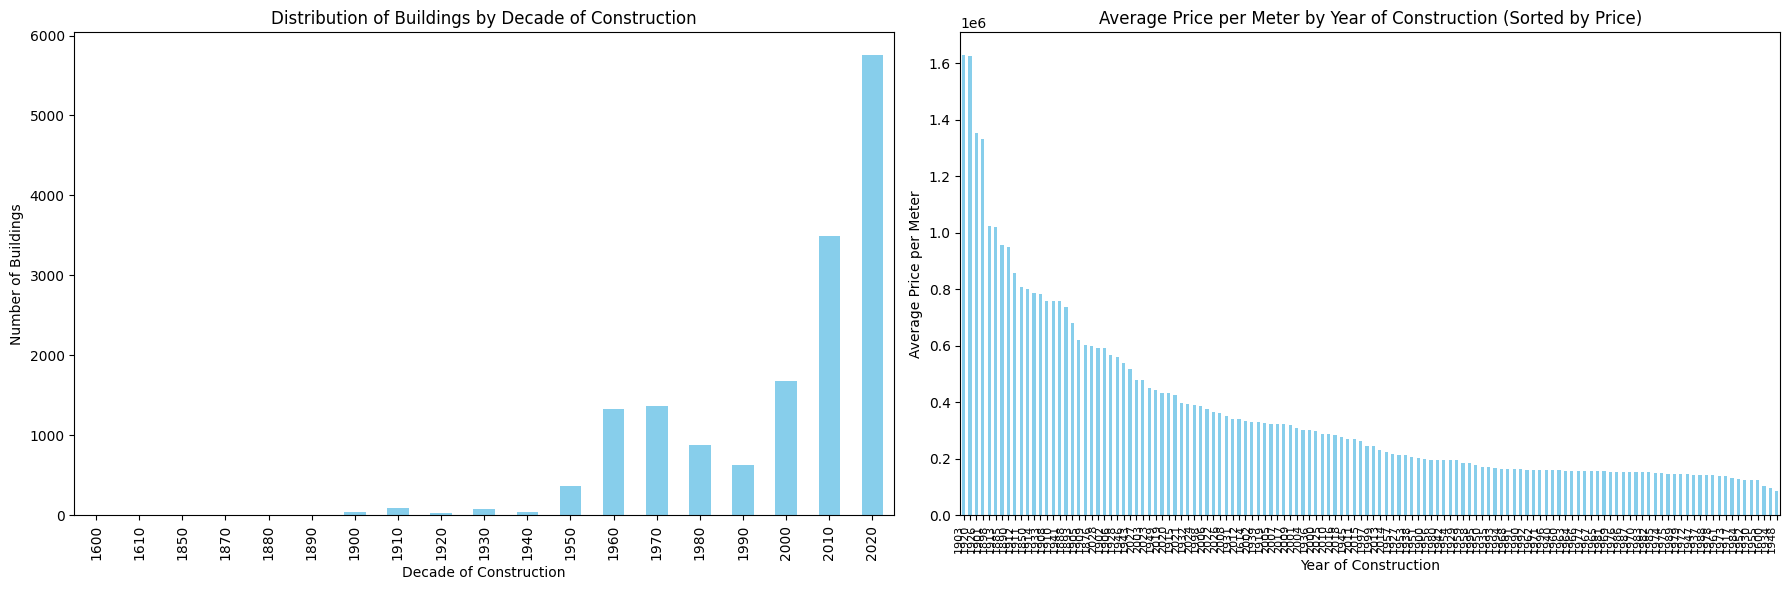

In [16]:
# Создаем область для графиков с двумя подграфиками (горизонтальная компоновка)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# График 1: Распределение зданий по десятилетиям
df['decade'] = (df['year_of_construction'] // 10) * 10  # Преобразуем в десятилетие
df['decade'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_xlabel("Decade of Construction")
axes[0].set_ylabel("Number of Buildings")
axes[0].set_title("Distribution of Buildings by Decade of Construction")

# График 2: Средняя цена за квадратный метр по году постройки с уменьшенными метками X
df.groupby('year_of_construction')['price_per_meter'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_xlabel("Year of Construction")
axes[1].set_ylabel("Average Price per Meter")
axes[1].set_title("Average Price per Meter by Year of Construction (Sorted by Price)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right', fontsize=8)  # Уменьшение размера текста по оси X

# Автоматическая настройка расстояний между графиками
plt.tight_layout()
plt.show()



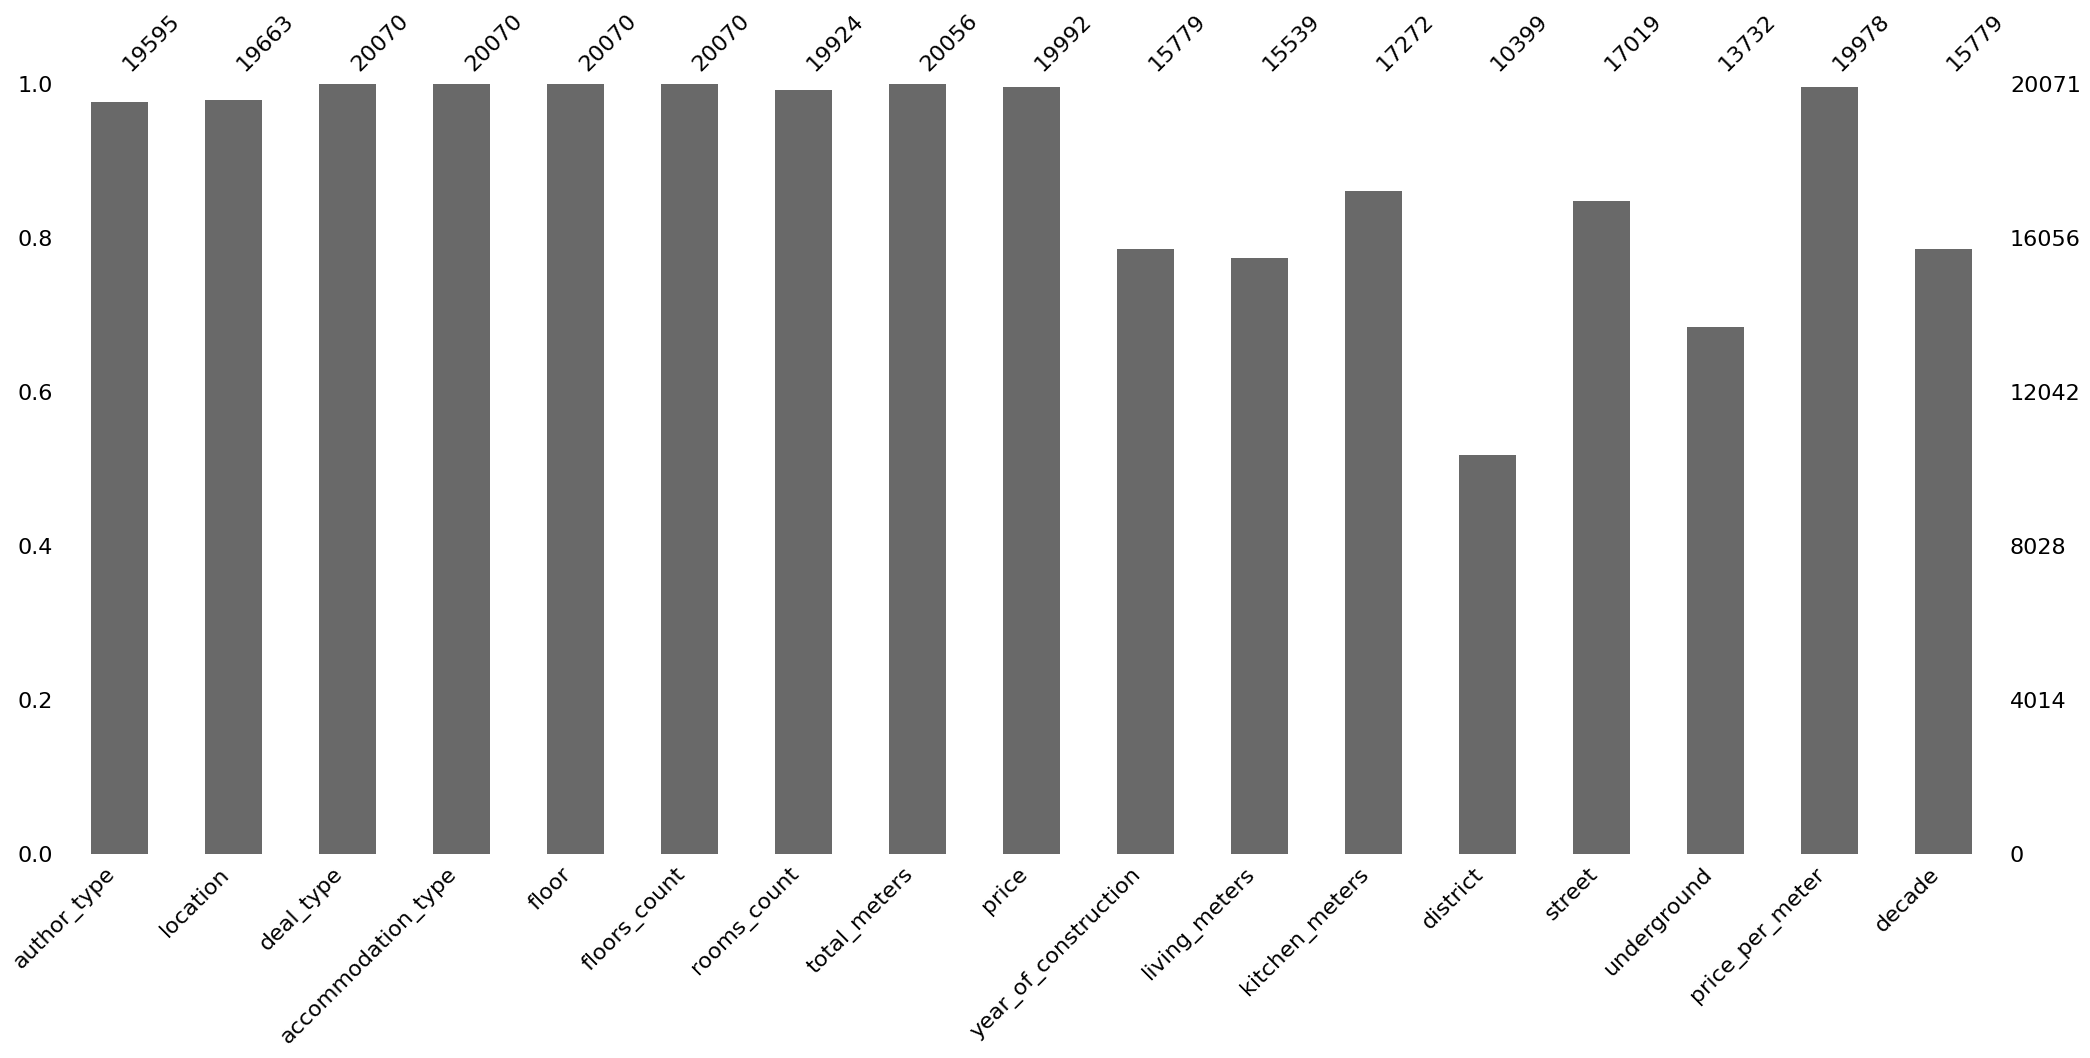

In [17]:
# выведем график пропусков
msno.bar(df)
plt.show()

In [18]:
missing_columns = df.columns[df.isnull().any()]
print("Столбцы с пропусками:", missing_columns.tolist())

Столбцы с пропусками: ['author_type', 'location', 'deal_type', 'accommodation_type', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'living_meters', 'kitchen_meters', 'district', 'street', 'underground', 'price_per_meter', 'decade']


1. **Пропуски в rooms_count**

In [19]:

df['rooms_count'] = df['rooms_count'].fillna(df['rooms_count'].median())
df[df['rooms_count'].isnull()]

,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter,decade


2. **Пропуски в author_type**

In [20]:
# -------------------- пропуски с author_type
df['author_type'] = df['author_type'].fillna(df['author_type'].mode()[0])

df[df['author_type'].isna()]

,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter,decade


3. **Пропуски в location**

In [21]:
# ---------------- пропуски с location
df['location'] = df['location'].fillna(df['location'].mode()[0])

df[df['location'].isna()]

,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter,decade


4. **Пропуски в accommodation_type и deal_type**

In [22]:
# ---------------- пропуски с deal_type и accommodation_type
del df['accommodation_type']
del df['deal_type']

5. **Пропуски в floor**

In [23]:
# -------------- пропуски с floor
df['floor'] = df['floor'].fillna(df['floor'].mode()[0])

df[df['floor'].isna()]

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter,decade


6. **Пропуски в floors_count**

In [24]:
# --------------- пропуски с floors_count
df = df.dropna(subset=['floors_count']) # тк пропуск один, и в той строке вообще почти нет данных

7.  **Пропуски в price**

In [25]:
# --------------- пропуски с price
df[df['price'].isna()].shape # 78 пропуска
# %%
# создаем словари верхних и нижних границ среднего значения цены по городам
down_border = {}
up_border = {}

for city in df['location'].value_counts().index.tolist():
    # Рассчитываем статистические параметры
    q1 = df[df['location'] == city]['price'].quantile(0.15)  # Первый квартиль
    q3 = df[df['location'] == city]['price'].quantile(0.80)  # Третий квартиль

    # Записываем данные в словари
    down_border[city] = q1
    up_border[city] = q3
    
# %%
print(down_border)
print(up_border)

{'Москва': np.int64(8500000), 'Балашиха': np.float64(5350000.0), 'Одинцово': np.float64(7421176.8), 'Видное': np.float64(6200000.0), 'Клин': np.float64(3900000.0), 'Дмитров': np.float64(4250000.0), 'Лобня': np.float64(5500000.0), 'Долгопрудный': np.float64(6860000.0), 'Химки': np.float64(7000000.0), 'Воскресенск': np.float64(2960000.0), 'Домодедово': np.float64(5335000.0), 'Дзержинский': np.float64(6250000.0), 'Кострома': np.float64(2571500.0), 'Егорьевск': np.float64(2905000.0), 'Дубна': np.float64(6000000.0), 'Электросталь': np.float64(3958000.0), 'Жуковский': np.float64(5000000.0), 'Серпухов': np.float64(3599750.0), 'Ступино': np.float64(4000000.0), 'Волоколамск': np.float64(3500000.0), 'Мытищи': np.float64(6842500.0), 'Чехов': np.float64(4200000.0), 'Люберцы': np.float64(5683000.0), 'Лосино-Петровский': np.float64(3492500.0), 'Красногорск': np.float64(7500462.0), 'Подольск': np.float64(4867500.0), 'Истра': np.float64(5300000.0), 'Шатура': np.float64(2450000.0), 'Ликино-Дулёво': np.

In [26]:
# Фильтрация данных по диапазону цен
def filter_prices(df, down_border, up_border):
    # Создаем маску для фильтрации
    mask = pd.Series([False] * len(df))  # Начальная маска, все значения False

    for city in down_border.keys():
        # Условия фильтрации для каждого города
        lower_bound = down_border[city]
        upper_bound = up_border[city]

        # Обновляем маску, добавляя условия для текущего города
        city_mask = (df['location'] == city) & (df['price'] >= lower_bound) & (df['price'] <= upper_bound)
        mask |= city_mask  # Объединяем с текущей маской

    # Фильтруем DataFrame, оставляя только строки с True в маске
    filtered_df = df.loc[mask | df['price'].isna()]  # Добавляем NaN в результирующий DataFrame

    return filtered_df

In [27]:
filtered_df = filter_prices(df, down_border, up_border)
# %%
filtered_df.head()

C:\Users\alzot\AppData\Local\Temp\ipykernel_24516\393028671.py:13: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  mask |= city_mask  # Объединяем с текущей маской
C:\Users\alzot\AppData\Local\Temp\ipykernel_24516\393028671.py:13: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  mask |= city_mask  # Объединяем с текущей маской
C:\Users\alzot\AppData\Local\Temp\ipykernel_24516\393028671.py:13: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  mask |= city_mask  # Объединяем с текущей маской
C:\Users\alzot\AppData\Local\Temp\ipykernel_24516

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter,decade
1,real_estate_agent,Электроугли,7,14,1,41.0,5350000,<NA>,18.0,9.0,NaN,Школьная,Железнодорожная,130487.804878,<NA>
3,real_estate_agent,Электроугли,5,5,1,33.3,3500000,1980,18.0,8.0,NaN,Пионерская,Железнодорожная,105105.105105,1980
4,real_estate_agent,Электроугли,1,3,2,45.8,4850000,<NA>,26.7,7.0,NaN,переулок 2-й Троицкий,Железнодорожная,105895.196507,<NA>
5,realtor,Электроугли,3,5,1,32.0,3500000,1971,20.0,6.0,NaN,Маяковского,Железнодорожная,109375.0,1970
6,real_estate_agent,Электроугли,2,5,1,31.9,3900000,<NA>,18.0,6.0,NaN,Школьная,Железнодорожная,122257.053292,<NA>


In [28]:
# заменяем NaN в price на среднее значение
for city in filtered_df['location'].value_counts().index.tolist():
    city_df = filtered_df[filtered_df['location']==city]
    missing_count = city_df['price'].isna().sum()
    
    if missing_count > 0:  # Проверяем, есть ли пропуски
        mean_price = city_df['price'].mean().astype(int)  # Вычисляем среднее значение цены для данного города
        filtered_df.loc[filtered_df['location'] == city, 'price'] = filtered_df.loc[filtered_df['location'] == city, 'price'].fillna(mean_price)  # Заменяем NaN на среднее значение
    
    print(f'{city}: {missing_count} пропусков, средняя цена: {mean_price if missing_count > 0 else "Нет пропусков"}')
# %%
# смотрим результат :)
filtered_df[filtered_df['price'].isna()].shape

Москва: 52 пропусков, средняя цена: 33508926
Балашиха: 0 пропусков, средняя цена: Нет пропусков
Одинцово: 25 пропусков, средняя цена: 10665886
Видное: 0 пропусков, средняя цена: Нет пропусков
Клин: 0 пропусков, средняя цена: Нет пропусков
Дмитров: 0 пропусков, средняя цена: Нет пропусков
Лобня: 0 пропусков, средняя цена: Нет пропусков
Долгопрудный: 0 пропусков, средняя цена: Нет пропусков
Химки: 0 пропусков, средняя цена: Нет пропусков
Воскресенск: 0 пропусков, средняя цена: Нет пропусков
Домодедово: 0 пропусков, средняя цена: Нет пропусков
Дзержинский: 0 пропусков, средняя цена: Нет пропусков
Кострома: 0 пропусков, средняя цена: Нет пропусков
Дубна: 0 пропусков, средняя цена: Нет пропусков
Егорьевск: 0 пропусков, средняя цена: Нет пропусков
Электросталь: 0 пропусков, средняя цена: Нет пропусков
Жуковский: 0 пропусков, средняя цена: Нет пропусков
Серпухов: 0 пропусков, средняя цена: Нет пропусков
Ступино: 0 пропусков, средняя цена: Нет пропусков
Волоколамск: 0 пропусков, средняя цена: 

(0, 15)

In [29]:
# -------------------------------- пропуски в year_of_construction
filtered_df['year_of_construction'] = filtered_df['year_of_construction']\
            .fillna(filtered_df['year_of_construction'].median())

filtered_df[filtered_df['year_of_construction'].isna()]

C:\Users\alzot\AppData\Local\Temp\ipykernel_24516\1734595615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year_of_construction'] = filtered_df['year_of_construction']\


,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter,decade


8. **Пропуски в total_meters**

In [30]:
filtered_df = filtered_df.dropna(subset=['total_meters'])

filtered_df[filtered_df['total_meters'].isna()]

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter,decade


9. **Пропуски в price_per_meter**

In [31]:
filtered_df['price_per_meter'] = (filtered_df['price']/filtered_df['total_meters']).round(2)
filtered_df[filtered_df['price_per_meter'].isna()]

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter,decade


10. **Пропуски в living_meters**

In [32]:
# ---------------------------------- пропуски в living_meters
# Отбираем строки без пропусков
df_no_na = filtered_df[filtered_df['living_meters'].notna()]
X_train = df_no_na[['total_meters', 'floor', 'floors_count', 'price', 'year_of_construction', 'price_per_meter']]
y_train = df_no_na['living_meters']

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)
# %%
# Отбор строк с пропущенными значениями в 'living_meters' для предсказания
nan_indices = filtered_df['living_meters'].isna()
X_pred = filtered_df.loc[nan_indices, ['total_meters', 'floor', 'floors_count', 'price', 'year_of_construction', 'price_per_meter']]
#%%
# Проверка, есть ли строки для предсказания
if not X_pred.empty:
    # Прогнозирование
    predicted_values = model.predict(X_pred)
    # Замена пропущенных значений на предсказанные
    filtered_df.loc[nan_indices, 'living_meters'] = predicted_values
else:
    print("Нет строк с пропущенными значениями для предсказания.")
# %%
filtered_df[filtered_df['living_meters'].isna()]

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter,decade


11. **Пропуски в kitchen_meters**

In [33]:
df_no_na = filtered_df[filtered_df['kitchen_meters'].notna()]
X_train = df_no_na[['total_meters', 'floor', 'floors_count', 'price', 'year_of_construction', 'price_per_meter', 'living_meters']]
y_train = df_no_na['kitchen_meters']

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Отбор строк с пропущенными значениями в 'living_meters' для предсказания
nan_indices = filtered_df['kitchen_meters'].isna()
X_pred = filtered_df.loc[nan_indices, ['total_meters', 'floor', 'floors_count', 'price', 'year_of_construction', 'price_per_meter', 'living_meters']]
#%%
# Проверка, есть ли строки для предсказания
if not X_pred.empty:
    # Прогнозирование
    predicted_values = model.predict(X_pred)
    # Замена пропущенных значений на предсказанные
    filtered_df.loc[nan_indices, 'kitchen_meters'] = predicted_values
else:
    print("Нет строк с пропущенными значениями для предсказания.")
# %%
filtered_df[filtered_df['kitchen_meters'].isna()]

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter,decade


12. **Пропуски в district и underground**

In [34]:
# выведем колво пропусков в коэдой из колонок
print(filtered_df[filtered_df['district'].isna()].shape[0]/filtered_df.shape[0])
print(filtered_df[filtered_df['underground'].isna()].shape[0]/filtered_df.shape[0])
# %%
# Замена NaN значений в 'district' и 'underground' на значения из 'location'
filtered_df['district'].fillna(filtered_df['location'], inplace=True)
filtered_df['underground'].fillna(filtered_df['location'], inplace=True)

0.47522642514651037
0.29165081056396985


C:\Users\alzot\AppData\Local\Temp\ipykernel_24516\3707461368.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['district'].fillna(filtered_df['location'], inplace=True)
C:\Users\alzot\AppData\Local\Temp\ipykernel_24516\3707461368.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [35]:
del filtered_df['decade']

13. **Пропуски в street**

In [36]:
print(filtered_df[filtered_df['street'].isna()].shape)
filtered_df = filtered_df.dropna(subset=['street'])
filtered_df[filtered_df['street'].isna()]

(2020, 14)


,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter


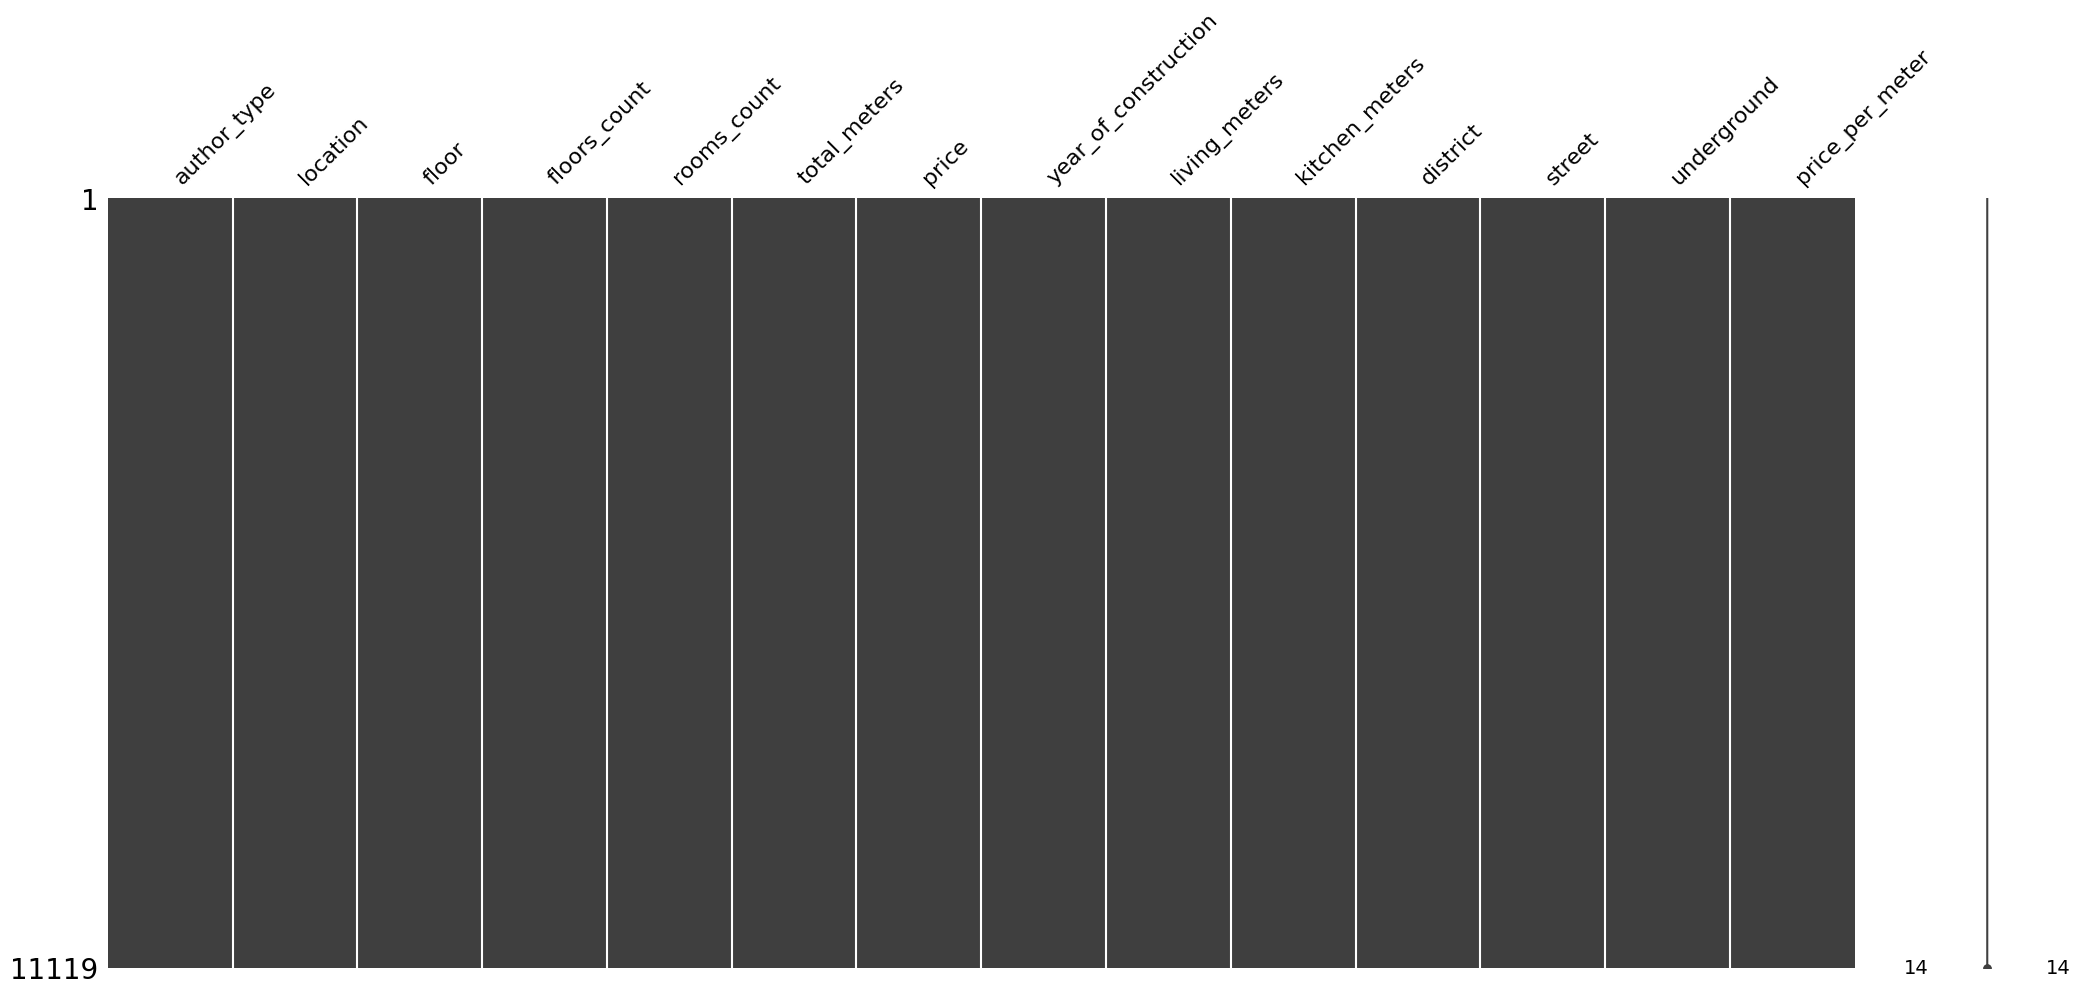

<Figure size 1500x1000 with 0 Axes>

(11119, 14)


In [37]:
msno.matrix(filtered_df)
plt.figure(figsize=(15,10))
plt.show()
print(filtered_df.shape)

In [38]:
filtered_df['kitchen_meters'].shape

(11119,)

In [39]:
filtered_df['kitchen_meters'] = filtered_df['kitchen_meters'].round(1)
filtered_df = filtered_df[filtered_df['kitchen_meters'] > 5]

In [40]:
filtered_df.shape

(10758, 14)

In [41]:
filtered_df = filtered_df[
    ((filtered_df['rooms_count'] == 1) & (filtered_df['living_meters'] >= 14)) |  # Условие для комнат = 1
    ((filtered_df['rooms_count'] > 1) & (filtered_df['living_meters'] >= 16))]    # Условие для комнат больше 1

In [42]:
filtered_df.shape

(10297, 14)

In [43]:
filtered_df.head()

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter
1,real_estate_agent,Электроугли,7,14,1,41.0,5350000,2014,18.0,9.0,Электроугли,Школьная,Железнодорожная,130487.8
3,real_estate_agent,Электроугли,5,5,1,33.3,3500000,1980,18.0,8.0,Электроугли,Пионерская,Железнодорожная,105105.11
4,real_estate_agent,Электроугли,1,3,2,45.8,4850000,2014,26.7,7.0,Электроугли,переулок 2-й Троицкий,Железнодорожная,105895.2
5,realtor,Электроугли,3,5,1,32.0,3500000,1971,20.0,6.0,Электроугли,Маяковского,Железнодорожная,109375.0
6,real_estate_agent,Электроугли,2,5,1,31.9,3900000,2014,18.0,6.0,Электроугли,Школьная,Железнодорожная,122257.05


In [44]:
filtered_df.info() # удалил unknown тип автора, и хреновые данные в дистрикте (продается квартира бла бла бла бла)

<class 'pandas.core.frame.DataFrame'>
Index: 10297 entries, 1 to 20068
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author_type           10297 non-null  object 
 1   location              10297 non-null  object 
 2   floor                 10297 non-null  Int64  
 3   floors_count          10297 non-null  Int64  
 4   rooms_count           10297 non-null  Int64  
 5   total_meters          10297 non-null  float64
 6   price                 10297 non-null  Int64  
 7   year_of_construction  10297 non-null  Int64  
 8   living_meters         10297 non-null  float64
 9   kitchen_meters        10297 non-null  float64
 10  district              10297 non-null  object 
 11  street                10297 non-null  object 
 12  underground           10297 non-null  object 
 13  price_per_meter       10297 non-null  Float64
dtypes: Float64(1), Int64(5), float64(3), object(5)
memory usage: 1.2+ MB


In [71]:
filtered_df.columns

Index(['author_type', 'location', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'living_meters',
       'kitchen_meters', 'district', 'street', 'underground',
       'price_per_meter'],
      dtype='object')

Text(0.5, 0, 'Этаж')

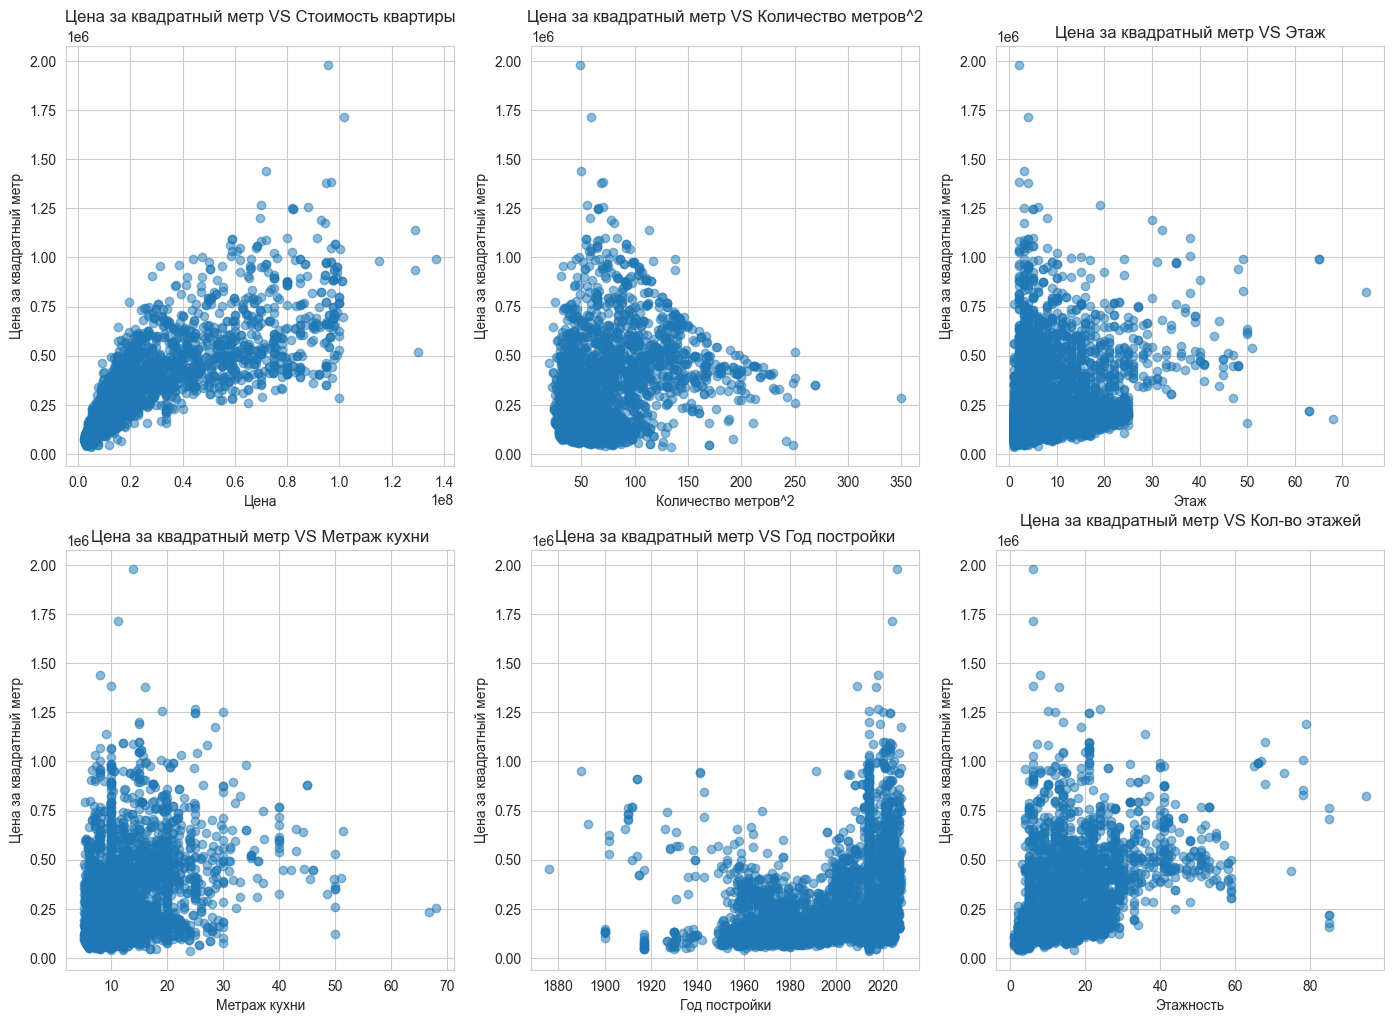

: 

In [76]:
figs, axs = plt.subplots(2,3, figsize = (17,12))

axs[0,0].scatter(filtered_df['price'], filtered_df['price_per_meter'], alpha=0.5)
axs[0,0].set_title('Цена за квадратный метр VS Стоимость квартиры')
axs[0,0].set_ylabel('Цена за квадратный метр')
axs[0,0].set_xlabel('Цена')

axs[0,1].scatter(filtered_df['total_meters'], filtered_df['price_per_meter'], alpha=0.5)
axs[0,1].set_title('Цена за квадратный метр VS Количество метров^2')
axs[0,1].set_ylabel('Цена за квадратный метр')
axs[0,1].set_xlabel('Количество метров^2')

axs[1,0].scatter(filtered_df['kitchen_meters'], filtered_df['price_per_meter'], alpha=0.5)
axs[1,0].set_title('Цена за квадратный метр VS Метраж кухни')
axs[1,0].set_ylabel('Цена за квадратный метр')
axs[1,0].set_xlabel('Метраж кухни')

axs[1,1].scatter(filtered_df['year_of_construction'], filtered_df['price_per_meter'], alpha=0.5)
axs[1,1].set_title('Цена за квадратный метр VS Год постройки')
axs[1,1].set_ylabel('Цена за квадратный метр')
axs[1,1].set_xlabel('Год постройки')

axs[1,2].scatter(filtered_df['floors_count'], filtered_df['price_per_meter'], alpha=0.5)
axs[1,2].set_title('Цена за квадратный метр VS Кол-во этажей')
axs[1,2].set_ylabel('Цена за квадратный метр')
axs[1,2].set_xlabel('Этажность')

axs[0,2].scatter(filtered_df['floor'], filtered_df['price_per_meter'], alpha=0.5)
axs[0,2].set_title('Цена за квадратный метр VS Этаж')
axs[0,2].set_ylabel('Цена за квадратный метр')
axs[0,2].set_xlabel('Этаж')

В некоторых тестах, я сокращал количество данных по Москве, чтобы посмотреть как будет влиять некоторая стандартизация кол-ва объявлений по городам

In [46]:
moscow_data = filtered_df[filtered_df['location'] == 'Москва']
other_data = filtered_df[filtered_df['location'] != 'Москва']

num_moscow_samples = 1600 # сокращаем москву)

moscow_sampled = moscow_data.sample(n=num_moscow_samples, random_state=42)

filtered_df = pd.concat([moscow_sampled, other_data], ignore_index=True)

Для того чтобы посмотреть корреляцию данных между собой, а также приступить к обучению модели, нам нужно перекодировать категориальные данные в числовые.
Для этого я буду использовать класс **LabelEncoder()** из scikit_learn.preprocessing

In [47]:
# нам нужно перекодировать author_type и location в числовые значения, для дальнейшей работы
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}

    for column in result.columns:
        if result.dtypes[column] == object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, column

# %%
encoded_data, encoders = number_encode_features(filtered_df)
encoded_data.head()

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_meter
0,3,34,3,15,3,95.0,35000000,2000,65.000000,20.0,160,909,16,368421.05
1,0,34,6,13,1,35.3,14608904,2027,21.100000,9.1,148,1120,6,413849.97
2,3,34,2,23,2,74.6,36000000,2024,28.400000,17.7,211,1455,296,482573.73
3,4,34,13,18,5,113.0,57000000,2017,51.000000,23.0,126,314,108,504424.78
4,4,34,4,22,1,84.4,20900000,2014,47.071533,14.0,103,310,12,247630.33


In [48]:
# получили чистый датасет
encoded_data.shape

(8696, 14)

# Выведем график распределения количества квартир по городам

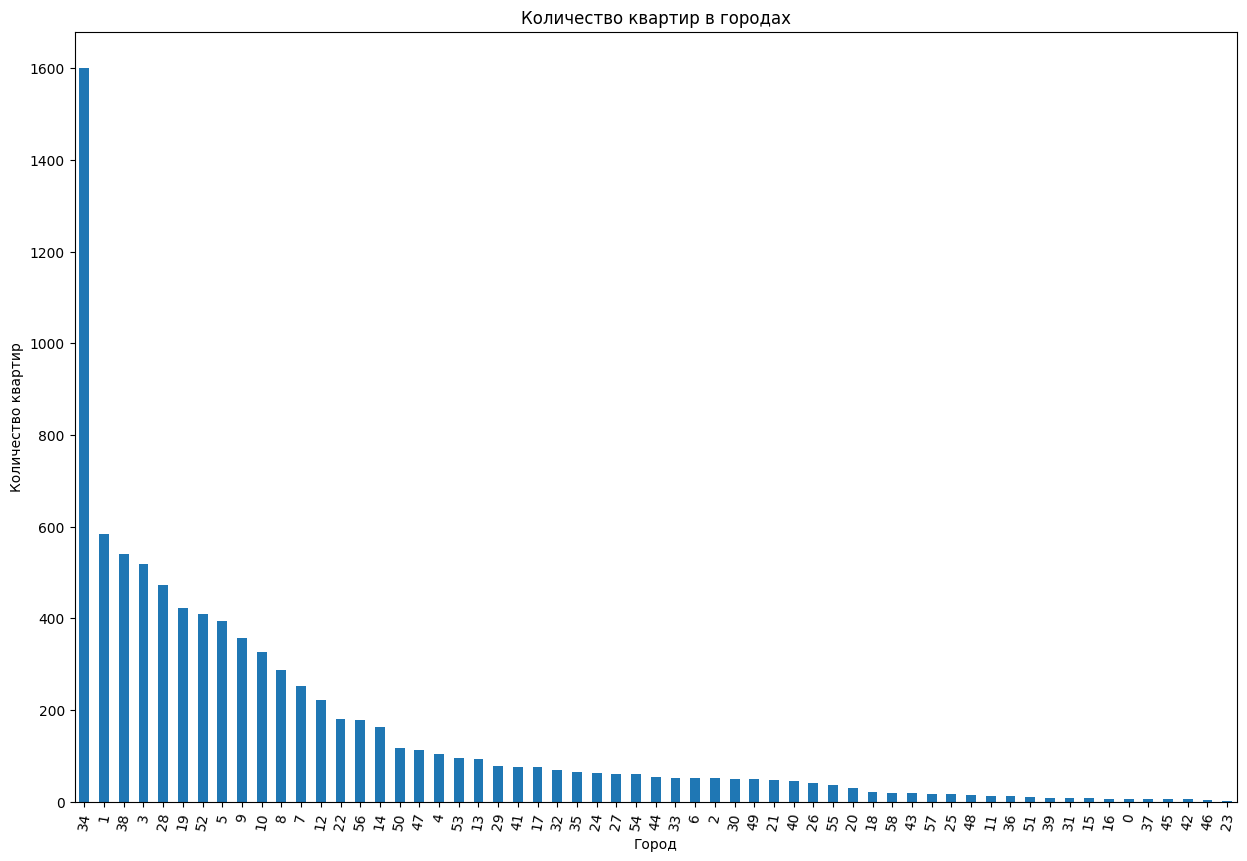

In [49]:
city_counts = encoded_data['location'].value_counts()

plt.figure(figsize=(15,10))
city_counts.plot(kind='bar')
plt.title('Количество квартир в городах')
plt.xlabel('Город')
plt.ylabel('Количество квартир')
plt.xticks(rotation=80)
plt.show()


Тепловая карта - отличный график для изучения корреляций между параметрами

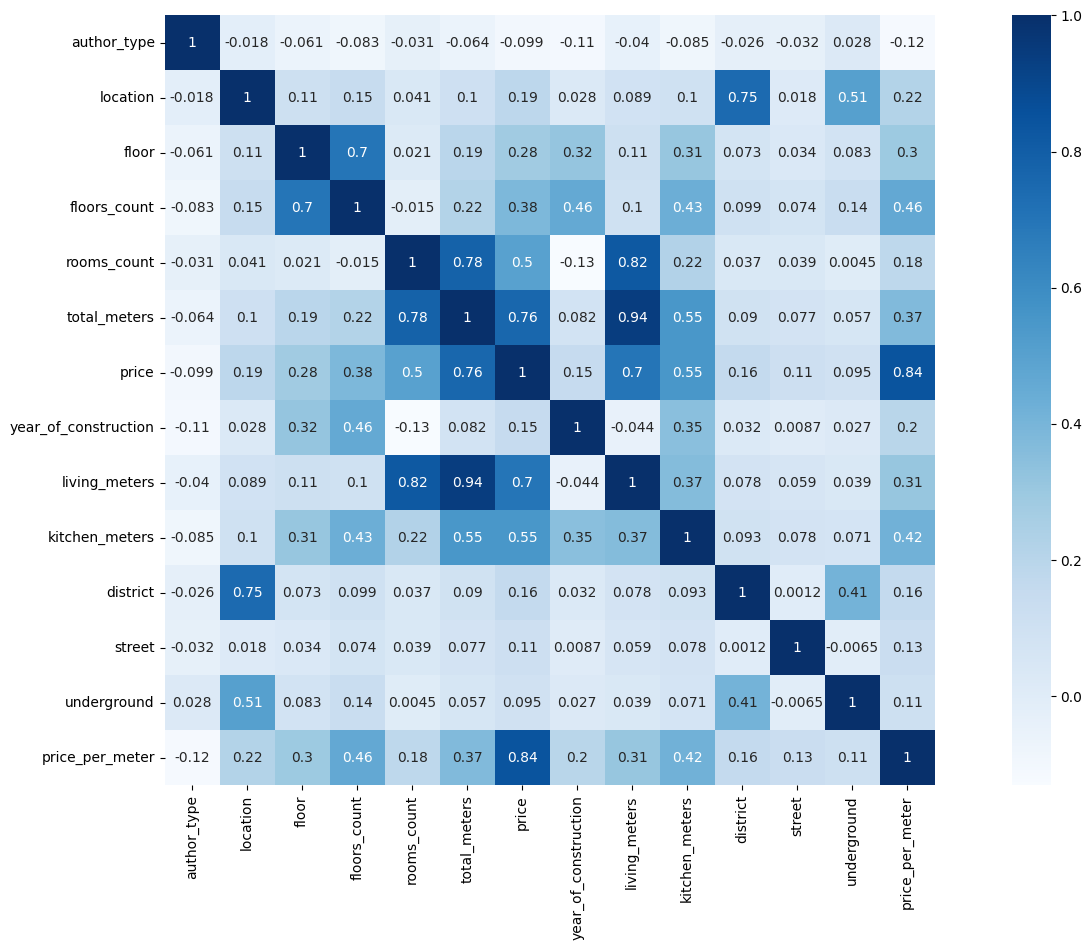

In [50]:
# смотрим тепловую карту наших значений
plt.figure(figsize=(20,10))
sns.heatmap(encoded_data.corr(),
            square=True,
            annot=True,
            fmt='.2g',
            cmap='Blues')
plt.savefig('heatmap.png')

**Подготавливаем датафрейм для обучения модели**

In [51]:
ml_df = encoded_data.copy(deep=True)
# %%
del ml_df['price']    # эта колонка нам не понадобится
# %%
ml_df.head(10)
ml_df.columns.tolist()

['author_type',
 'location',
 'floor',
 'floors_count',
 'rooms_count',
 'total_meters',
 'year_of_construction',
 'living_meters',
 'kitchen_meters',
 'district',
 'street',
 'underground',
 'price_per_meter']

Назначаем Х и у, а также разделяем датасет на тестовые и тренировочные данные

In [52]:
X = ml_df.drop('price_per_meter', axis=1)  # из икса удаляем целевую переменную
y = ml_df['price_per_meter']               # в игрике оставляем только целевую переменную
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

В качестве модели я буду использовать **RandomForestRegression**, тк она показывала хороший результат на ранних стадиях анализа (на 200% лучше чем линейная регрессия)

In [63]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [64]:
y_pred = model.predict(X_test)

Выводим значения метрик получившейся модели

In [65]:
# 1. MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 2. MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 3. RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 4. R²
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r_squared}")

# 5. MAPE 
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 30708.197145900584
Mean Squared Error (MSE): 4986877210.344479
Root Mean Squared Error (RMSE): 70617.82501850704
R-squared (R²): 0.8116703349492467
Mean Absolute Percentage Error (MAPE): 12.438822274745952%


Выведем графики на основе полученных предиктов и ошибок

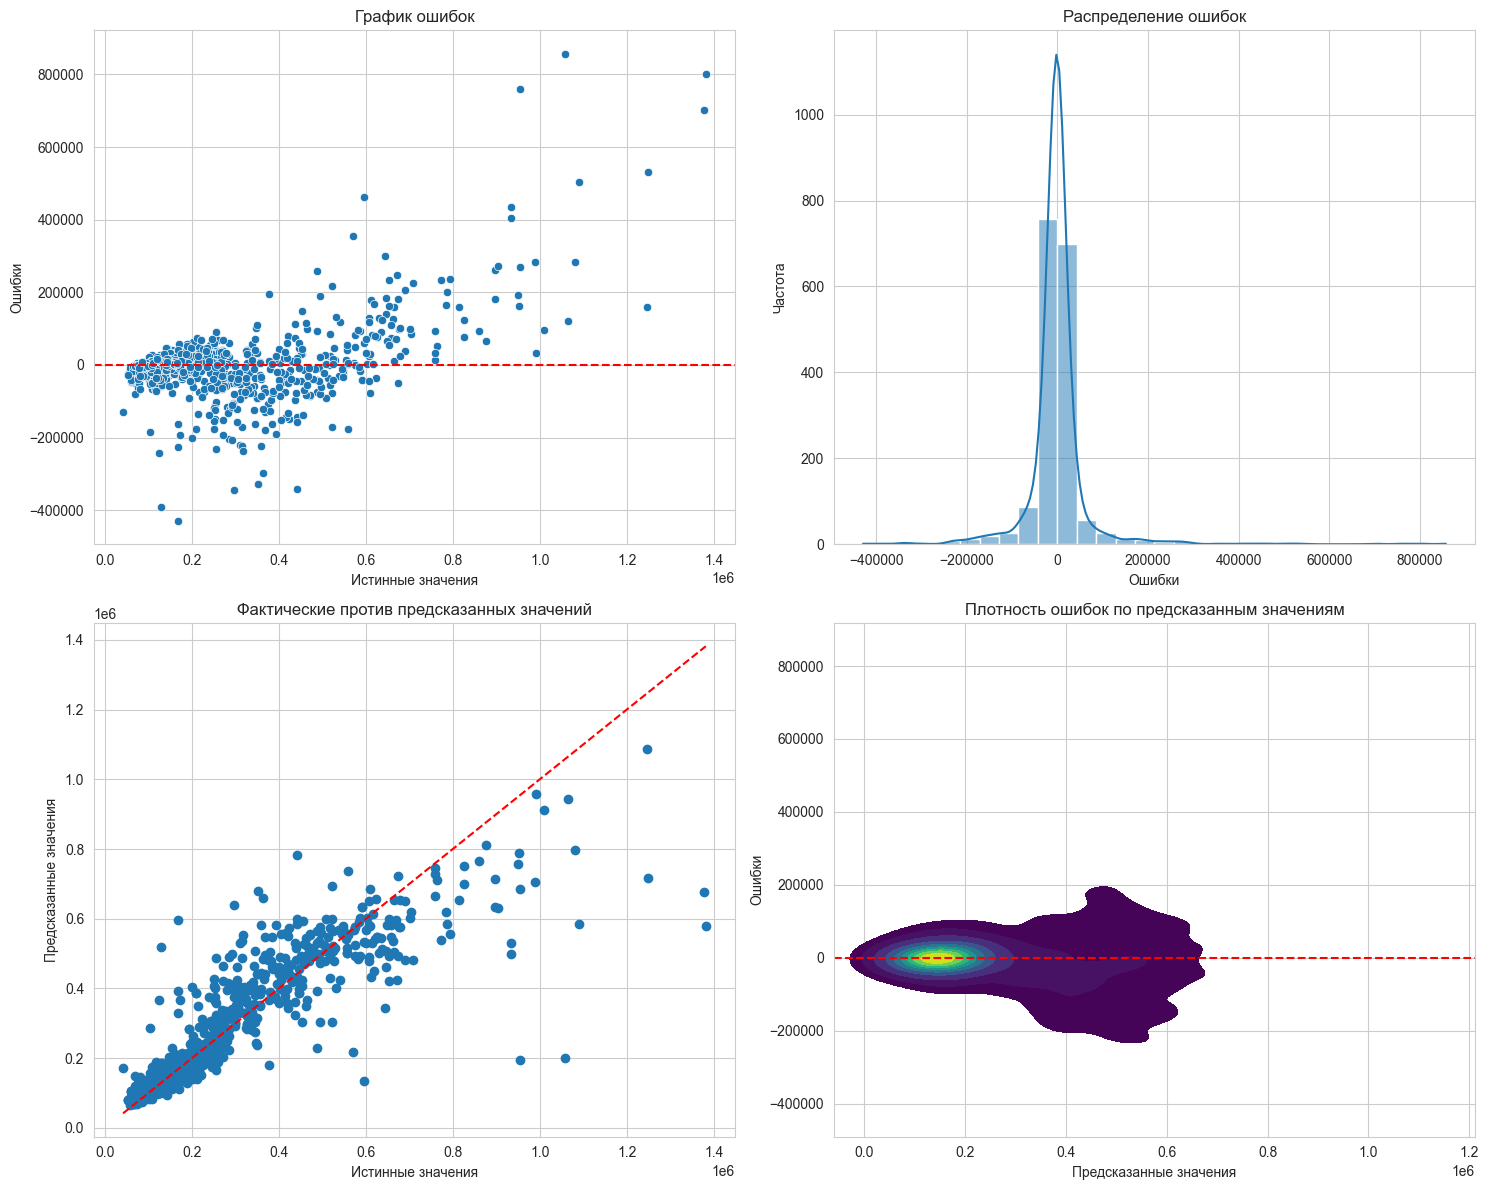

In [66]:
errors = y_test - y_pred

# Настройка общего пространства графиков
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Ошибки против истинных значений
sns.scatterplot(x=y_test, y=errors, ax=axs[0, 0])
axs[0, 0].axhline(0, color='red', linestyle='--')
axs[0, 0].set_title('График ошибок')
axs[0, 0].set_xlabel('Истинные значения')
axs[0, 0].set_ylabel('Ошибки')

# График 2: Распределение ошибок
sns.histplot(errors, bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Распределение ошибок')
axs[0, 1].set_xlabel('Ошибки')
axs[0, 1].set_ylabel('Частота')

# График 3: Фактические против предсказанных значений
axs[1, 0].scatter(y_test, y_pred)
axs[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Линия y=x
axs[1, 0].set_title('Фактические против предсказанных значений')
axs[1, 0].set_xlabel('Истинные значения')
axs[1, 0].set_ylabel('Предсказанные значения')

# График 4: Плотность ошибок по предсказанным значениям
sns.kdeplot(x=y_pred, y=errors, fill=True, cmap="viridis", ax=axs[1, 1])
axs[1, 1].axhline(0, color='red', linestyle='--')
axs[1, 1].set_title('Плотность ошибок по предсказанным значениям')
axs[1, 1].set_xlabel('Предсказанные значения')
axs[1, 1].set_ylabel('Ошибки')

# Общий вывод графиков
plt.tight_layout()
plt.show()

In [57]:
import joblib
# сохраняем модель в файл
joblib.dump(model, 'random_forest_model7.pkl')

['random_forest_model7.pkl']

Здесь я составил небольшой датасет различных вариаций моделей и их целевых (для меня) метрик, которые я успел попробовать

In [61]:
data = {
    'model_name': ['RFR Base', 'RFR + Street + Years Deleted', 'RFR + Street + Years Filled', 'RFR + Years Deleted', 'RFR + Street + Years Losted Through Cleaning', 'RFR + Street + Years Losted + Moscow Reduced800', 'RFR + Years Losted + Moscow Reduced800', 'RFR + Years Losted + Moscow Reduced1600'],  # Названия моделей
    'mae': [34200.38, 34876.61, 34043.1, 34205.33, 31950.2, 24693.47, 23797.39, 30768.36],  # Значения MAE для каждой модели
    'r_squared': [86, 87.5, 87.3, 86.2, 89.5, 81.8, 80.1, 81.1]  # Значения R^2 для каждой модели
}
metrics_df = pd.DataFrame(data)
metrics_df

,model_name,mae,r_squared
0,RFR Base,34200.38,86.0
1,RFR + Street + Years Deleted,34876.61,87.5
2,RFR + Street + Years Filled,34043.10,87.3
3,RFR + Years Deleted,34205.33,86.2
4,RFR + Street + Years Losted Through Cleaning,31950.20,89.5
5,RFR + Street + Years Losted + Moscow Reduced800,24693.47,81.8
6,RFR + Years Losted + Moscow Reduced800,23797.39,80.1
7,RFR + Years Losted + Moscow Reduced1600,30768.36,81.1


Небольшой график, на котором показаны лучшие модели по MAE и R^2

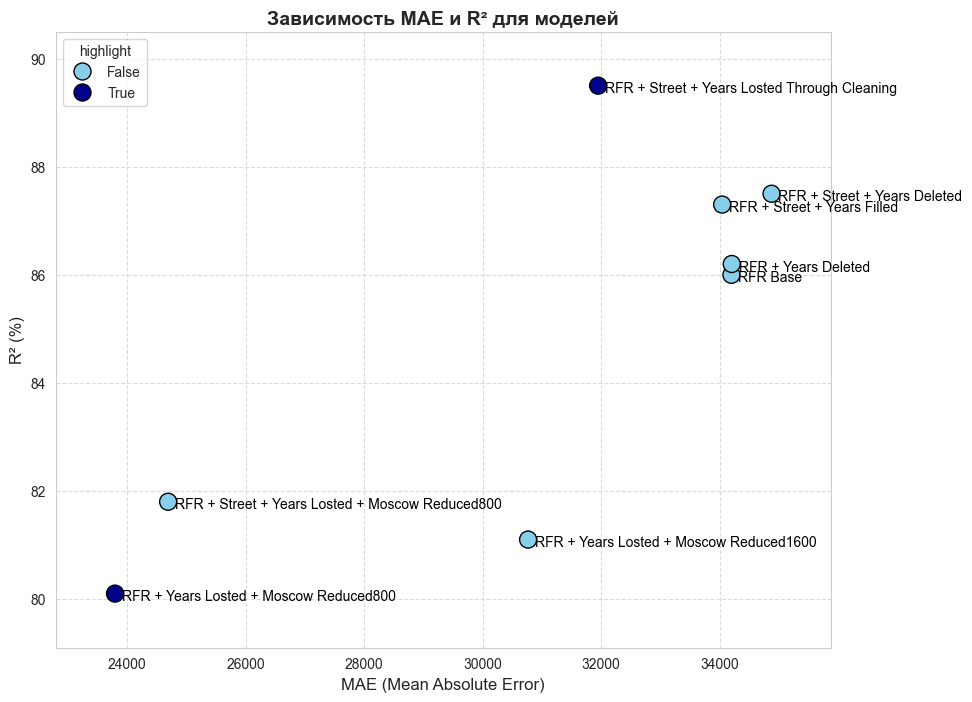

In [62]:

# Находим индексы максимальных MAE и R²
min_mae_index = metrics_df['mae'].idxmin()
max_r2_index = metrics_df['r_squared'].idxmax()

# Добавляем колонку для выделения точек
metrics_df['highlight'] = False
metrics_df.loc[min_mae_index, 'highlight'] = True
metrics_df.loc[max_r2_index, 'highlight'] = True

# Создаем график
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Создаем scatter plot с Seaborn
scatter = sns.scatterplot(
    x='mae',
    y='r_squared',
    data=metrics_df,
    s=150,
    hue='highlight',  # Используем новую колонку для изменения цвета
    palette={True: 'darkblue', False: 'skyblue'},  # Цвета для выделенных и обычных точек
    edgecolor='black'
)

# Добавление аннотаций
for i, txt in enumerate(metrics_df['model_name']):
    plt.annotate(
        txt,
        (metrics_df['mae'][i], metrics_df['r_squared'][i]),
        xytext=(5, -5),
        textcoords='offset points',
        fontsize=10,
        color='black'
    )

# Оформление осей и заголовка
plt.xlabel('MAE (Mean Absolute Error)', fontsize=12)
plt.ylabel('R² (%)', fontsize=12)
plt.title('Зависимость MAE и R² для моделей', fontsize=14, weight='bold')

# Добавление сетки
plt.grid(True, linestyle='--', alpha=0.7)

# Настройка границ осей для лучшего отображения данных
plt.xlim(metrics_df['mae'].min() - 1000, metrics_df['mae'].max() + 1000)
plt.ylim(metrics_df['r_squared'].min() - 1, metrics_df['r_squared'].max() + 1)
plt.show()


In [67]:
filtered_df.to_csv('powerbi.csv')

['author_type',
 'location',
 'floor',
 'floors_count',
 'rooms_count',
 'total_meters',
 'price',
 'year_of_construction',
 'living_meters',
 'kitchen_meters',
 'district',
 'street',
 'underground',
 'price_per_meter',
 'decade']